In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pygrib
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [15]:
grib_file = '../data2022.grib'

In [16]:
#load grib file with pygrib
grbs = pygrib.open(grib_file)
grbs.seek(0)

In [18]:
#select the start of the file
grbs.seek(0)

In [19]:
#grbs[1] - first message - messages start from 1
grb = grbs[1]

In [20]:
grb

1:10 metre U wind component:m s**-1 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202201010000

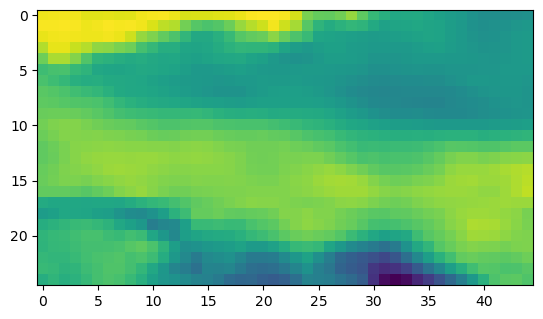

In [21]:
plt.imshow(grb.values)

In [22]:
#get coordinates from grib
lats,lons = grb.latlons()

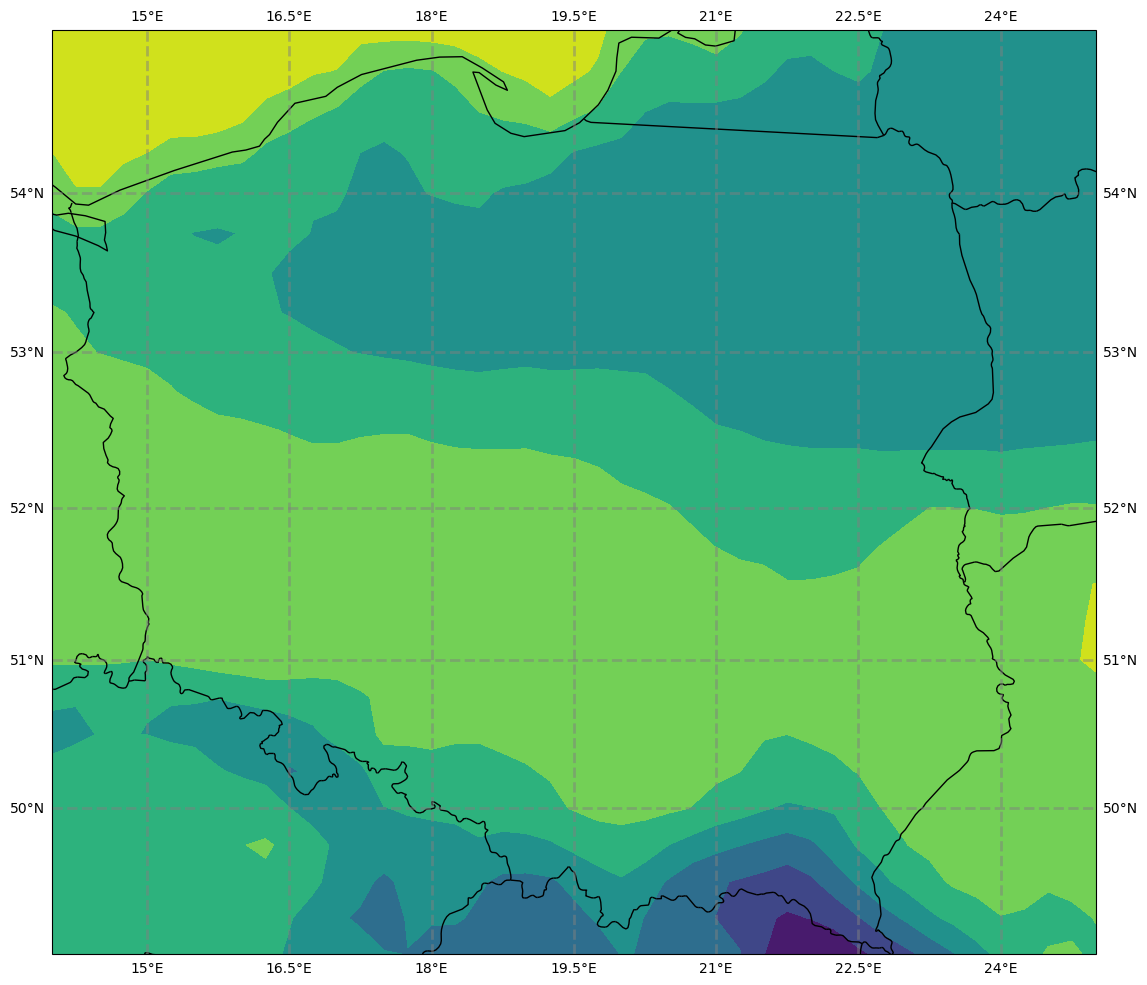

In [23]:
# map_crs = ccrs.LambertConformal(central_longitude=40, central_latitude=20)
# map_crs = ccrs.LambertCylindrical(central_longitude=40)
map_crs = ccrs.Mercator(central_longitude=40)

# map_crs = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

fig = plt.figure(1,figsize=(14,12))

ax = plt.subplot(1,1,1, projection=map_crs)
ax.set_extent([14,25,49,55])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS)

gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.contourf(lons, lats, grb.values, transform=data_crs)



In [24]:
#select the grib message with attribute's name and correct date and time 
grbs.seek(0)
test = grbs.select(name = '10 metre U wind component', date = 20220101, time = 0000)[0]
test

1:10 metre U wind component:m s**-1 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202201010000

In [25]:
#draw map with selected attribute, date and time
def draw_poland(file, name, date, time):
    grbs = pygrib.open(file)
    grbs.seek(0)
    grb = grbs.select(name = name, date = date, time = time)[0]
    lats,lons = grb.latlons()

    map_crs = ccrs.Mercator(central_longitude=40)

    data_crs = ccrs.PlateCarree()

    fig = plt.figure(1,figsize=(14,12))

    ax = plt.subplot(1,1,1, projection=map_crs)
    ax.set_extent([14,25,49,55])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.BORDERS)

    gl = ax.gridlines(
        draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
    )
    ax.contourf(lons, lats, grb.values, transform=data_crs)

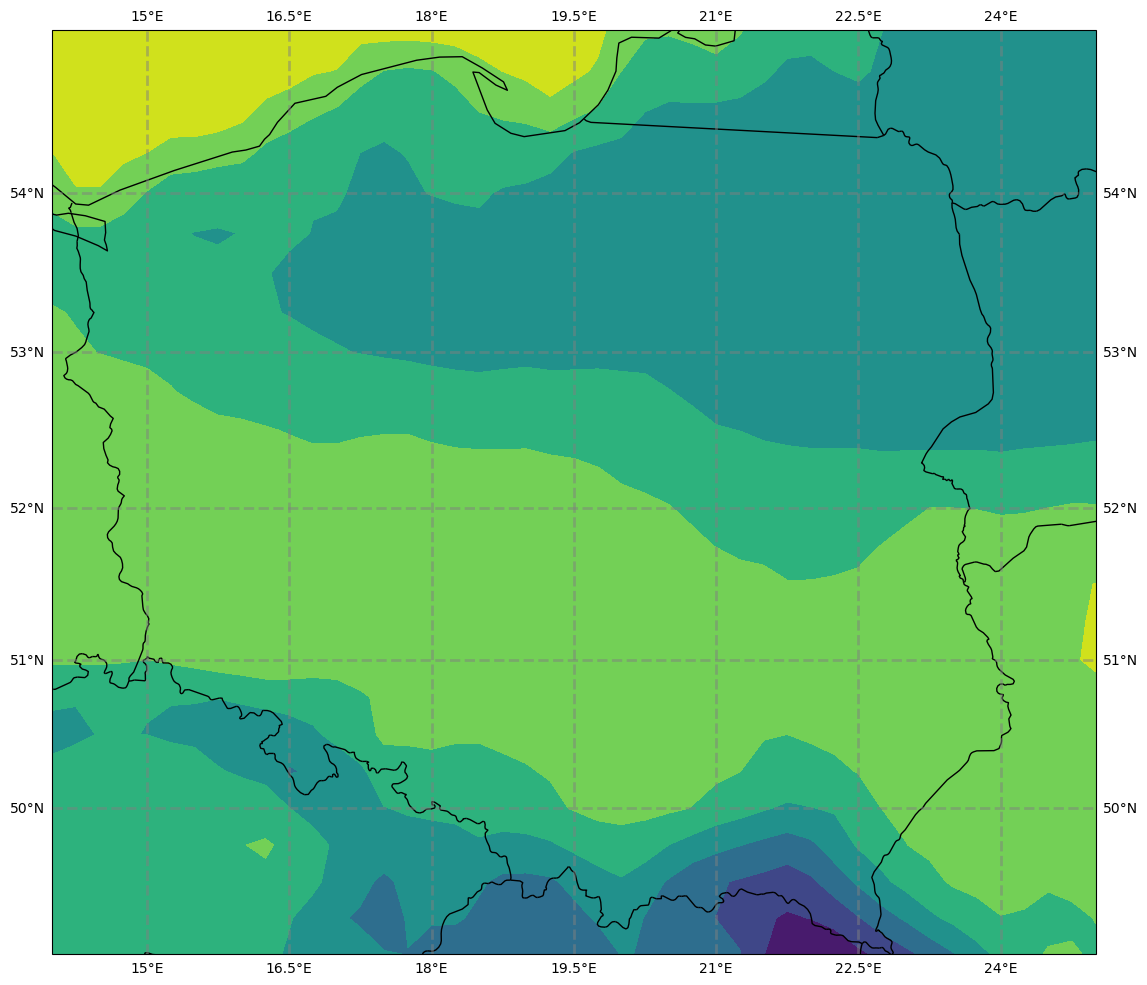

In [26]:
file = '../data2022.grib'
name = '10 metre U wind component'
date = 20220101
time = 0000
draw_poland(file, name, date ,time)